# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Store the url and the units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
city_q = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Print the beginning of the iterative requests
print("Beginning Data Retrieval")
print("-----------------------------")

# Create empty lists to create the future DataFrame
city_list = []
cloud = []
country = []
date = []
hum = []
lat = []
lng = []
maxtemp = []
windspeed = []

# For loop to iterate throughout all the chosen cities in our list
for x in range(len(cities)):
    
    # Create a request for the current city and parse it
    request = requests.get(city_q + cities[x]).json()
    
    # If the city is found (cod 200)
    if request["cod"] == 200:
        
        #print(json.dumps(request, indent = 4, sort_keys = True))
        
        # Print log for each found city
        print(f'Processing Record {x} of Set {x} | {cities[x]}')
        
        # Append the respective information for each column in the future DataFrame
        city_list.append(cities[x])
        cloud.append(request["clouds"]["all"])
        country.append(request["sys"]["country"])
        date.append(request["dt"])
        hum.append(request["main"]["humidity"])
        lat.append(request["coord"]["lat"])
        lng.append(request["coord"]["lon"])
        maxtemp.append(request["main"]["temp_max"])
        windspeed.append(request["wind"]["speed"])
        
    # If the city is not found (it's called cod 400)
    else:
        
        # Print log for the skipped city
        print("City not found, skipping...")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 0 | uspenka
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 2 | norman wells
Processing Record 3 of Set 3 | albany
City not found, skipping...
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 6 | atuona
City not found, skipping...
Processing Record 8 of Set 8 | saint-joseph
City not found, skipping...
Processing Record 10 of Set 10 | samdari
City not found, skipping...
Processing Record 12 of Set 12 | ushuaia
Processing Record 13 of Set 13 | thompson
City not found, skipping...
Processing Record 15 of Set 15 | puerto ayora
Processing Record 16 of Set 16 | hermanus
Processing Record 17 of Set 17 | kapaa
Processing Record 18 of Set 18 | lensk
Processing Record 19 of Set 19 | mataura
City not found, skipping...
Processing Record 21 of Set 21 | fortuna
Processing Record 22 of Set 22 | chuy
Processing Record 23 of Set 23 | ilulissat
Processing Record 24 of Set 24 | tiksi
Pr

Processing Record 387 of Set 387 | cockburn town
Processing Record 388 of Set 388 | ambilobe
Processing Record 389 of Set 389 | poum
Processing Record 390 of Set 390 | hurghada
Processing Record 391 of Set 391 | nizwa
Processing Record 392 of Set 392 | gospic
Processing Record 393 of Set 393 | heinola
Processing Record 394 of Set 394 | brigantine
Processing Record 395 of Set 395 | rio grande
Processing Record 396 of Set 396 | marawi
Processing Record 397 of Set 397 | mortka
Processing Record 398 of Set 398 | aykhal
Processing Record 399 of Set 399 | amahai
Processing Record 400 of Set 400 | morro bay
Processing Record 401 of Set 401 | soavinandriana
Processing Record 402 of Set 402 | nueve de julio
Processing Record 403 of Set 403 | aswan
Processing Record 404 of Set 404 | ola
Processing Record 405 of Set 405 | burnie
Processing Record 406 of Set 406 | hambantota
Processing Record 407 of Set 407 | camargo
Processing Record 408 of Set 408 | marzuq
Processing Record 409 of Set 409 | chat

Processing Record 579 of Set 579 | ugoofaaru
City not found, skipping...
Processing Record 581 of Set 581 | puerto maldonado
Processing Record 582 of Set 582 | kurchum
Processing Record 583 of Set 583 | taguatinga
Processing Record 584 of Set 584 | saint-pierre
Processing Record 585 of Set 585 | saintes
Processing Record 586 of Set 586 | jimo
Processing Record 587 of Set 587 | tambacounda
Processing Record 588 of Set 588 | lingolsheim
Processing Record 589 of Set 589 | boden
Processing Record 590 of Set 590 | fort morgan
Processing Record 591 of Set 591 | karachi
Processing Record 592 of Set 592 | talnakh
City not found, skipping...
Processing Record 594 of Set 594 | evensk
Processing Record 595 of Set 595 | bat yam
Processing Record 596 of Set 596 | makhachkala
Processing Record 597 of Set 597 | bintulu
Processing Record 598 of Set 598 | yeppoon
Processing Record 599 of Set 599 | qaqortoq
Processing Record 600 of Set 600 | saraipali
Processing Record 601 of Set 601 | paita
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame with each of the previously filled lists
cities_df = pd.DataFrame({"City": city_list,
                          "Cloudiness": cloud,
                          "Country": country,
                          "Date": date,
                          "Humidity": hum,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": maxtemp,
                          "Wind Speed": windspeed})

# Export the DataFrame to a .csv file
cities_df.to_csv("cities.csv", index = False)

# Display the DataFrame information
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 9 columns):
City          556 non-null object
Cloudiness    556 non-null int64
Country       556 non-null object
Date          556 non-null int64
Humidity      556 non-null int64
Lat           556 non-null float64
Lng           556 non-null float64
Max Temp      556 non-null float64
Wind Speed    556 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.2+ KB


In [7]:
# Display the first 5 rows of the DataFrame
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,uspenka,83,UA,1585616628,67,48.39,39.16,10.22,3.85
1,hobart,40,AU,1585616628,48,-42.88,147.33,17.00,4.60
2,norman wells,20,CA,1585616498,45,65.28,-126.83,-15.00,3.10
3,albany,90,US,1585616629,75,42.60,-73.97,7.00,0.67
4,georgetown,20,MY,1585616464,88,5.41,100.34,28.00,2.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

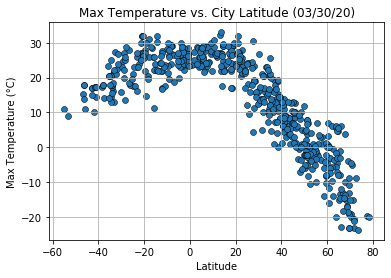

In [11]:
# Store the current date in a variable
ad = date.today().strftime("%m/%d/%y")

# Create a scatter plot using the Latitude (x-axis) and Max Temperature (y-label) columns from the DF
# Add an 0.5-width black-edge margin to each value
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], edgecolor = "black", linewidth = 0.5)

# Add a dynamic title (includes the date of analysis variable), an x-label and a y-label
plt.title(f'Max Temperature vs. City Latitude ({ad})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Show grid
plt.grid()

# Show plot
plt.show()

#### Analysis (03/30/2020)

##### Code

* This code calculates and gathers the current date, and then plots the Max Temperature variation as the Latitude increases (both the max temperature and the latitude are gathered from the cities_df respectively)


* Then the labels and grid are added, and finally the plot is shown.


##### Results

* The shape of the curve is a concave down parabola, meaning that the further the values are from the vertex, the more negative they are.


* The previous point can be explained as follows: the further the location is from the equator (northern or southernwise), the lower its maximum temperature is.


#### Latitude vs. Humidity Plot

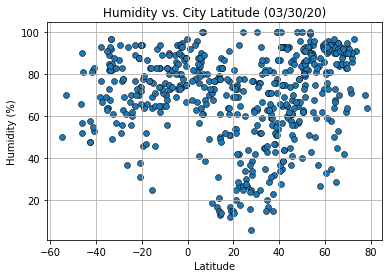

In [12]:
# Create a scatter plot using the Latitude (x-axis) and Humidity (y-label) columns from the DF
# Add an 0.5-width black-edge margin to each value
plt.scatter(cities_df["Lat"], cities_df["Humidity"], edgecolor = "black", linewidth = 0.5)

# Add a dynamic title (includes the date of analysis variable), an x-label and a y-label
plt.title(f'Humidity vs. City Latitude ({ad})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Show grid
plt.grid()

# Show plot
plt.show()

#### Analysis (03/30/2020)

##### Code 

* This code gathers the current date from the previous calculation, and then plots the Humidity variation as the Latitude increases (both the humidity and the latitude are gathered from the cities_df respectively).


* Then the labels and grid are added, and finally the plot is shown.


##### Results

* The humidity seems to vary more closer to the equator.


#### Latitude vs. Cloudiness Plot

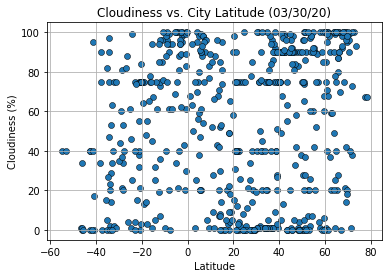

In [13]:
# Create a scatter plot using the Latitude (x-axis) and Cloudiness (y-label) columns from the DF
# Add an 0.5-width black-edge margin to each value
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], edgecolor = "black", linewidth = 0.5)

# Add a dynamic title (includes the date of analysis variable), an x-label and a y-label
plt.title(f'Cloudiness vs. City Latitude ({ad})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show grid
plt.grid()

# Show plot
plt.show()

#### Analysis (03/30/2020)

##### Code

* This code gathers the current date from the previous calculation, and then plots the Cloudiness variation as the Latitude increases (both the cloudiness and the latitude are gathered from the cities_df respectively)


* Then the labels and grid are added, and finally the plot is shown.


##### Results

* The cloudiness doesn't seem to have a direct relation with the latitude.

#### Latitude vs. Wind Speed Plot

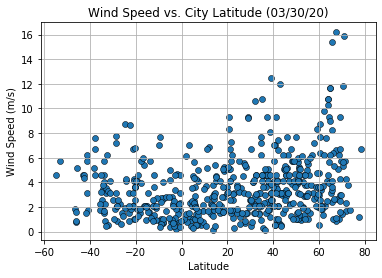

In [16]:
# Create a scatter plot using the Latitude (x-axis) and Wind Speed (y-label) columns from the DF
# Add an 0.5-width black-edge margin to each value
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], edgecolor = "black", linewidth = 0.5)

# Add a dynamic title (includes the date of analysis variable), an x-label and a y-label
plt.title(f'Wind Speed vs. City Latitude ({ad})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Show grid
plt.grid()

# Show plot
plt.show()

#### Analysis (03/30/2020)

##### Code

* This code gathers the current date from the previous calculation, and then plots the Wind Speed variation as the Latitude increases (both the wind speed and the latitude are gathered from the cities_df respectively)


* Then the labels and grid are added, and finally the plot is shown.


##### Results

* The wind speed seems to increase from the equator to both the north and south.


* This means the equator has the calmest winds, and the wind speed across the Earth can be modeled as a concave up parabola.

## Linear Regression

In [17]:
# Create a function to create Linear Regression plots
# Arguments: x-axis list, y-axis list, xlabel, ylabel, coordinates for the line equation (x, y)
def linreg(x,y,xlabel,ylabel,xlineq,ylineq):
    
    # Sets the list values as float to allow plotting
    x = x.astype('float')
    y = y.astype('float')
    
    # Linear regression function, taking in as arguments the x and y lists, and returning the slope, the intercept
    # the r-value, p-value and the stderr
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # Linear regression values, multiplying the x list value by the slope and adding the intercept
    regress_values = x * slope + intercept
    
    # Line equation expressed as y = mx + b, where m is the slope and b is the intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x,y, alpha = 0.5)

    # Plot regression line
    plt.plot(x,regress_values,"r-")
    
    # Annotate the line equation function (place it in the user defined coordenates)
    # The coordinates for the line equation (xlineq, ylineq) have to be set according to each data set
    # Every time this analysis is made, this coordinate has to be modified to match the scale
    plt.annotate(line_eq,(xlineq,ylineq),fontsize=15,color="green")

    # Label plot
    #plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Print r square value
    print(f"R squared: {rvalue}")

    # Show plot
    plt.show()

In [18]:
# Northern Hemisphere DataFrame
north_df = cities_df[cities_df["Lat"] >= 0]
#north_df.head()

# Southern Hemisphere DataFrame
south_df = cities_df[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: -0.9168391705453346


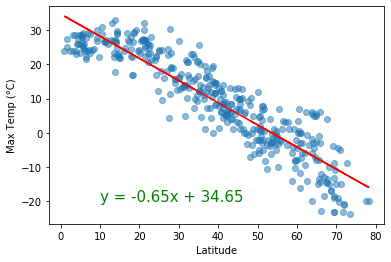

In [19]:
# Call the linear regression-plotting function for Latitude and Max Temperature in the Northern Hemisphere
linreg(north_df["Lat"], north_df["Max Temp"], "Latitude", "Max Temp (°C)", 10, -20)

#### Analysis (03/30/2020)

##### Code

* This code calls the linear regression formula (explained in its comments) for the Max Temp vs Latitude for the northern hemisphere.


##### Results

* This linear regression shows an inversely proportional relationship between the latitude and the max temperature.


* The previous conclusion can be explained as follows: the bigger the latitude, the lower the max temperature.


* It can also be explained as follows: the further north (away from the equator) you go, the colder it gets.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6248195836319341


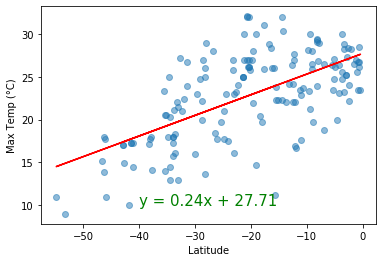

In [20]:
# Call the linear regression-plotting function for Latitude and Max Temperature in the Southern Hemisphere
linreg(south_df["Lat"], south_df["Max Temp"], "Latitude", "Max Temp (°C)",-40, 10)

#### Analysis (03/30/2020)

##### Code

* This code calls the linear regression formula (explained in its comments) for the Max Temp vs Latitude for the southern hemisphere.


##### Results

* This linear regression shows a proportional relationship between the latitude and the max temperature.


* The previous conclusion can be explained as follows: the bigger the latitude, the higher the max temperature.


* It can also be explained as follows: the closer to the equator you go, the warmer it gets.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.280815533737403


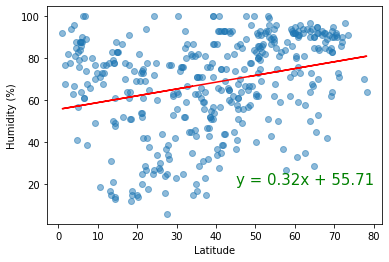

In [21]:
# Call the linear regression-plotting function for Latitude and Humidity in the Northern Hemisphere
linreg(north_df["Lat"], north_df["Humidity"], "Latitude", "Humidity (%)", 45, 20)

#### Analysis (03/30/2020)

##### Code

* This code calls the linear regression formula (explained in its comments) for the Humidity vs Latitude for the northern hemisphere.


##### Results

* This linear regression shows an proportional relationship between the latitude and the humidity.


* The previous conclusion can be explained as follows: the bigger the latitude, the higher the humidity percentage.


* It can also be explained as follows: as you head north, the humidity increases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.23257448909334943


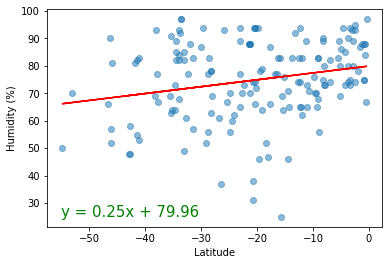

In [22]:
# Call the linear regression-plotting function for Latitude and Humidity in the Southern Hemisphere
linreg(south_df["Lat"], south_df["Humidity"], "Latitude", "Humidity (%)",-55, 25)

#### Analysis (03/30/2020)

##### Code

* This code calls the linear regression formula (explained in its comments) for the Humidity vs Latitude for the southern hemisphere.


##### Results

* This linear regression shows an proportional relationship between the latitude and the humidity.


* The previous conclusion can be explained as follows: the bigger the latitude, the higher the humidity percentage.


* It can also be explained as follows: as you head north, the humidity increases.


* By joining both hemisphere's analysis, the conclusion is that the southern hemisphere is drier than the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.16923251209385573


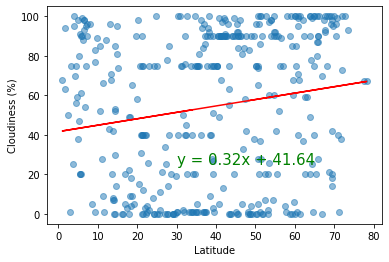

In [23]:
# Call the linear regression-plotting function for Latitude and Cloudiness in the Northern Hemisphere
linreg(north_df["Lat"], north_df["Cloudiness"], "Latitude", "Cloudiness (%)", 30, 25)

#### Analysis (03/30/2020)

##### Code

* This code calls the linear regression formula (explained in its comments) for the Cloudiness vs Latitude for the northern hemisphere.


##### Results

* This linear regression shows an proportional relationship between the latitude and the cloudiness.


* The previous conclusion can be explained as follows: the bigger the latitude, the cloudier.


* It can also be explained as follows: as you head north, the cloudiness increases.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.4879054378045701


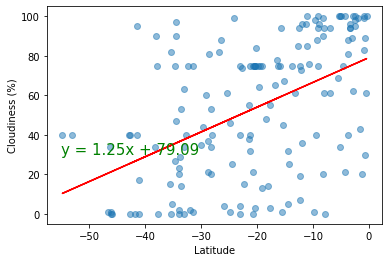

In [24]:
# Call the linear regression-plotting function for Latitude and Cloudiness in the Southern Hemisphere
linreg(south_df["Lat"], south_df["Cloudiness"], "Latitude", "Cloudiness (%)", -55, 30)

#### Analysis (03/30/2020)

##### Code

* This code calls the linear regression formula (explained in its comments) for the Cloudiness vs Latitude for the southern hemisphere.


##### Results

* This linear regression shows an proportional relationship between the latitude and the cloudiness, with an almost 1:1 ratio.


* The previous conclusion can be explained as follows: the further north you go, the cloudier it gets.


* It can also be explained as follows: as you head north, the cloudiness increases.


* Comparing both hemisphere's results, the conclusion is that the cloudiness increases heavily from the south to the equator, and then it keep increasing to the north but with a gentler pace.

####  Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

R squared: 0.2781191200522568


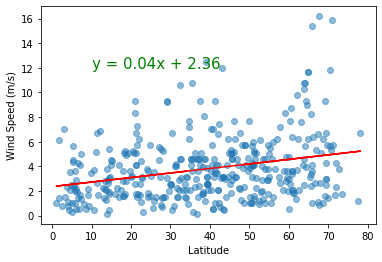

In [27]:
# Call the linear regression-plotting function for Latitude and Wind Speed in the Northern Hemisphere
linreg(north_df["Lat"], north_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", 10, 12)

#### Analysis (03/30/2020)

##### Code

* This code calls the linear regression formula (explained in its comments) for the Wind Speed vs Latitude for the northern hemisphere.


##### Results

* This linear regression shows a proportional relationship between the latitude and the wind speed.


* The previous conclusion can be explained as follows: the bigger the latitude, the faster the wind goes.


* It can also be explained as follows: as you head north (further from the equator), the wind speed increases.

####  Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

R squared: -0.26862661417365247


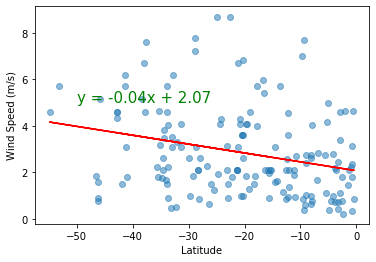

In [28]:
# Call the linear regression-plotting function for Latitude and Wind Speed in the Southern Hemisphere
linreg(south_df["Lat"], south_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", -50, 5)

#### Analysis (03/30/2020)

##### Code

* This code calls the linear regression formula (explained in its comments) for the Wind Speed vs Latitude for the southern hemisphere.


##### Results

* This linear regression shows an inversely proportional relationship between the latitude and the wind speed.


* The previous conclusion can be explained as follows: the bigger the latitude (equatorwise), the slower the wind goes.


* It can also be explained as follows: as you head towards the equator, the wind speed decreases.


* Comparing both hemisphere's results, the conclusion is that the equator has the calmest winds, while the north and south poles have the fastest winds.